### ----------------------------------------------------------------------------------------------------------
## 社会変革型 医療データサイエンティスト育成講座
# Chapter 4: 重回帰モデル
### ----------------------------------------------------------------------------------------------------------

#### 1. ライブラリ使用方法

In [1]:
# データのロード
import pandas as pd

# ホームディレクトリにデータを格納していれば、フォルダの指定は必要ありません
bace_data = pd.read_csv('~/DK-SRP/bace_data.csv')
bace_data.head()

,Unnamed: 0,MW,AlogP,HBA,HBD,RB,HeavyAtomCount,ChiralCenterCount,ChiralCenterCountAllPossible,RingCount,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),pIC50,class
0,0,431.56979,4.4014,3.0,2.0,5.0,32.0,2.0,2.0,4.0,...,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,9.154901,1.0
1,1,657.81073,2.6412,5.0,4.0,16.0,47.0,6.0,6.0,4.0,...,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,8.853872,1.0
2,2,591.74091,2.5499,4.0,3.0,11.0,42.0,2.0,3.0,5.0,...,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,8.698970,1.0
3,3,591.67828,3.1680,4.0,3.0,12.0,40.0,4.0,5.0,3.0,...,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,8.698970,1.0
4,4,629.71283,3.5086,3.0,3.0,11.0,44.0,2.0,3.0,5.0,...,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,8.698970,1.0


In [2]:
# 説明変数として分子量 (MW)およびAlogP, 目的変数としてpIC50を使用します
import numpy as np
X = np.array(bace_data[['MW','AlogP']])
y = np.array(bace_data['pIC50'])

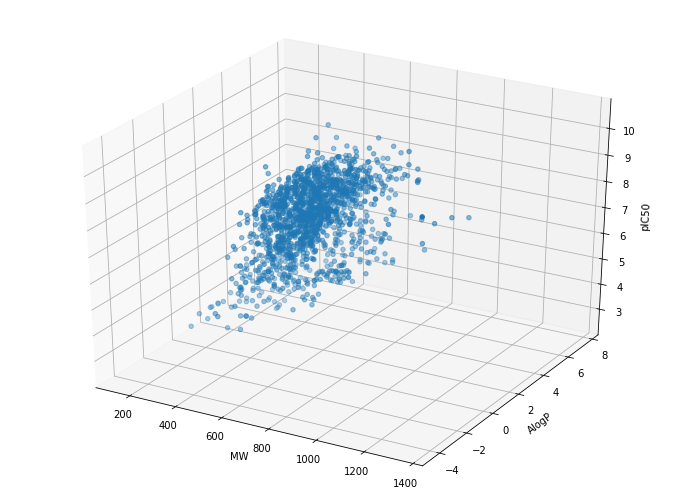

In [3]:
# （参考）データの可視化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=[12,9]) 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],y)
ax.set_xlabel('MW')
ax.set_ylabel('AlogP')
ax.set_zlabel('pIC50')
plt.show()

In [4]:
# sklearn.linear_modelによる線形回帰モデル構築
from sklearn.linear_model import LinearRegression

# インスタンスの作成
linModel = LinearRegression()
linModel.fit(X,y)

# 結果の出力
print(linModel.intercept_, linModel.coef_)

4.037857822121818 [0.00477486 0.06128492]


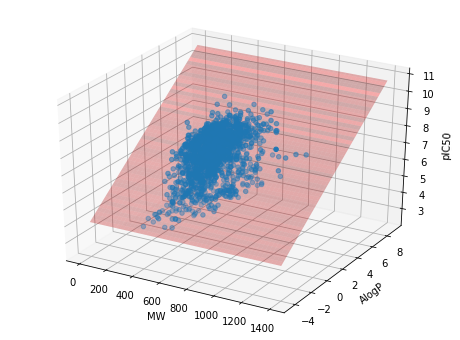

In [5]:
# （参考）回帰の結果の可視化
x1 = np.linspace(0,1400,100)
x2 = np.linspace(-4,9,100)
X1,X2 = np.meshgrid(x1,x2)
yy = np.zeros([100,100])
for i,xx1 in enumerate(x1):
    for j,xx2 in enumerate(x2):
        yy[i,j] = linModel.intercept_ + xx1*linModel.coef_[0] 
        + xx2*linModel.coef_[1]
        
fig = plt.figure(figsize=[8,6]) 
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, yy, color='r', alpha=0.3)
ax.scatter(X[:,0],X[:,1],y)
ax.set_xlabel('MW')
ax.set_ylabel('AlogP')
ax.set_zlabel('pIC50')
plt.show()

In [6]:
# (参考) statsmodelsによる線形回帰モデル構築
import statsmodels.api as sm

# "add_constant"を行う必要があります
X = sm.add_constant(X)

# OLSはordinary least squareのことです
mod = sm.OLS(y, X)
res = mod.fit()

# summary機能があるのでとても便利！
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           5.11e-74
Time:                        12:00:29   Log-Likelihood:                -2440.8
No. Observations:                1522   AIC:                             4888.
Df Residuals:                    1519   BIC:                             4904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0379      0.137     29.470      0.0

#### 2. データ標準化

In [7]:
# 説明変数と目的変数の定義
X = np.array(bace_data[['MW','AlogP']])
y = np.array(bace_data[['pIC50']]) # 2次元データとする必要がある

In [8]:
# StandardScalerを使用したデータの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
y_st = scaler.fit_transform(y)

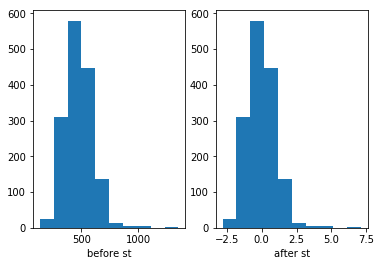

In [9]:
# （参考）ヒストグラムを用いた標準化の確認
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].hist(X[:,0])
ax[0].set_xlabel('before st')
ax[1].hist(X_st[:,0])
ax[1].set_xlabel('after st')
plt.show()

In [10]:
# 標準化なしのデータで線形モデル構築
import statsmodels.api as sm
X_c = sm.add_constant(X)
mod = sm.OLS(y,X_c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           5.11e-74
Time:                        12:00:30   Log-Likelihood:                -2440.8
No. Observations:                1522   AIC:                             4888.
Df Residuals:                    1519   BIC:                             4904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0379      0.137     29.470      0.0

In [11]:
# 標準化したデータでモデル構築
X_st_c = sm.add_constant(X_st)
mod = sm.OLS(y_st,X_st_c)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           5.11e-74
Time:                        12:00:30   Log-Likelihood:                -1990.5
No. Observations:                1522   AIC:                             3987.
Df Residuals:                    1519   BIC:                             4003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.002e-16      0.023  -4.36e-15      1.0